In [60]:
print('importing libraries')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn as sns
import sys,traceback
print('libraries loaded')

importing libraries
libraries loaded


In [61]:
df = pd.read_csv('/Users/akanshajajodia/Desktop/EmpAtt/Dataset/Train.csv')

In [62]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [63]:
df.columns

Index(['Employee_ID', 'Gender', 'Age', 'Education_Level',
       'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess',
       'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate',
       'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits',
       'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6',
       'VAR7', 'Attrition_rate'],
      dtype='object')

In [64]:
df.dtypes

Employee_ID                   object
Gender                        object
Age                          float64
Education_Level                int64
Relationship_Status           object
Hometown                      object
Unit                          object
Decision_skill_possess        object
Time_of_service              float64
Time_since_promotion           int64
growth_rate                    int64
Travel_Rate                    int64
Post_Level                     int64
Pay_Scale                    float64
Compensation_and_Benefits     object
Work_Life_balance            float64
VAR1                           int64
VAR2                         float64
VAR3                         float64
VAR4                         float64
VAR5                           int64
VAR6                           int64
VAR7                           int64
Attrition_rate               float64
dtype: object

In [65]:
df.isna().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [66]:
df.isnull().values.any()

True

In [67]:
df.isnull().any()

Employee_ID                  False
Gender                       False
Age                           True
Education_Level              False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Time_of_service               True
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Post_Level                   False
Pay_Scale                     True
Compensation_and_Benefits    False
Work_Life_balance             True
VAR1                         False
VAR2                          True
VAR3                         False
VAR4                          True
VAR5                         False
VAR6                         False
VAR7                         False
Attrition_rate               False
dtype: bool

In [68]:
df.shape

(7000, 24)

In [69]:
df.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [70]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ': '+ str(df[column].unique()) )
        print(df[column].value_counts())
        print("--------------")
    
    

Employee_ID: ['EID_23371' 'EID_18000' 'EID_3891' ... 'EID_8077' 'EID_19597' 'EID_1640']
EID_24337    1
EID_5894     1
EID_8706     1
EID_13525    1
EID_24630    1
            ..
EID_17449    1
EID_15076    1
EID_24928    1
EID_6767     1
EID_6493     1
Name: Employee_ID, Length: 7000, dtype: int64
--------------
Gender: ['F' 'M']
F    4114
M    2886
Name: Gender, dtype: int64
--------------
Relationship_Status: ['Married' 'Single']
Married    4520
Single     2480
Name: Relationship_Status, dtype: int64
--------------
Hometown: ['Franklin' 'Springfield' 'Clinton' 'Lebanon' 'Washington']
Lebanon        2070
Springfield    1736
Franklin       1523
Washington     1106
Clinton         565
Name: Hometown, dtype: int64
--------------
Unit: ['IT' 'Logistics' 'Quality' 'Human Resource Management' 'Purchasing'
 'Sales' 'Production' 'Operarions' 'Accounting and Finance' 'Marketing'
 'R&D' 'Security']
IT                           1394
Logistics                    1173
Sales                        

In [71]:
df.corr()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
Age,1.000000,-0.005770,0.918853,0.145760,0.001270,0.012266,0.002440,0.012966,0.003073,0.005696,0.005406,0.007569,0.001803,0.000015,-0.000832,0.008746,-0.015498
Education_Level,-0.005770,1.000000,-0.012793,-0.002077,0.002991,-0.017690,0.009986,0.006834,-0.015262,-0.002185,-0.010312,-0.009689,0.004500,0.005444,0.009195,0.012909,-0.008143
Time_of_service,0.918853,-0.012793,1.000000,0.137014,-0.003486,0.004843,-0.002286,0.020347,-0.002557,0.004757,0.003858,0.006863,-0.006024,0.003194,0.007618,0.007034,-0.016447
Time_since_promotion,0.145760,-0.002077,0.137014,1.000000,0.014147,-0.012061,-0.008851,-0.008901,-0.007423,-0.002873,0.004211,-0.002783,-0.003724,0.000563,0.017264,0.005173,0.013880
growth_rate,0.001270,0.002991,-0.003486,0.014147,1.000000,0.008460,-0.006887,-0.004145,-0.018324,0.001351,0.010883,0.010991,0.021336,-0.015122,-0.005860,-0.017993,0.014247
Travel_Rate,0.012266,-0.017690,0.004843,-0.012061,0.008460,1.000000,0.021299,-0.011689,0.004132,0.023898,0.008374,-0.009019,-0.005933,-0.003866,-0.012280,-0.006271,-0.012608
Post_Level,0.002440,0.009986,-0.002286,-0.008851,-0.006887,0.021299,1.000000,0.022389,-0.014473,-0.008458,-0.007043,0.010387,-0.012778,0.013008,0.002765,-0.003397,0.016402
Pay_Scale,0.012966,0.006834,0.020347,-0.008901,-0.004145,-0.011689,0.022389,1.000000,-0.022742,0.011354,0.006296,0.003380,-0.010286,0.018080,-0.012318,0.002381,-0.015236
Work_Life_balance,0.003073,-0.015262,-0.002557,-0.007423,-0.018324,0.004132,-0.014473,-0.022742,1.000000,-0.022030,-0.001492,0.004476,-0.026753,0.022196,0.003871,0.024534,0.020746
VAR1,0.005696,-0.002185,0.004757,-0.002873,0.001351,0.023898,-0.008458,0.011354,-0.022030,1.000000,0.002260,-0.003318,0.002112,0.007904,-0.002771,0.009355,-0.008073


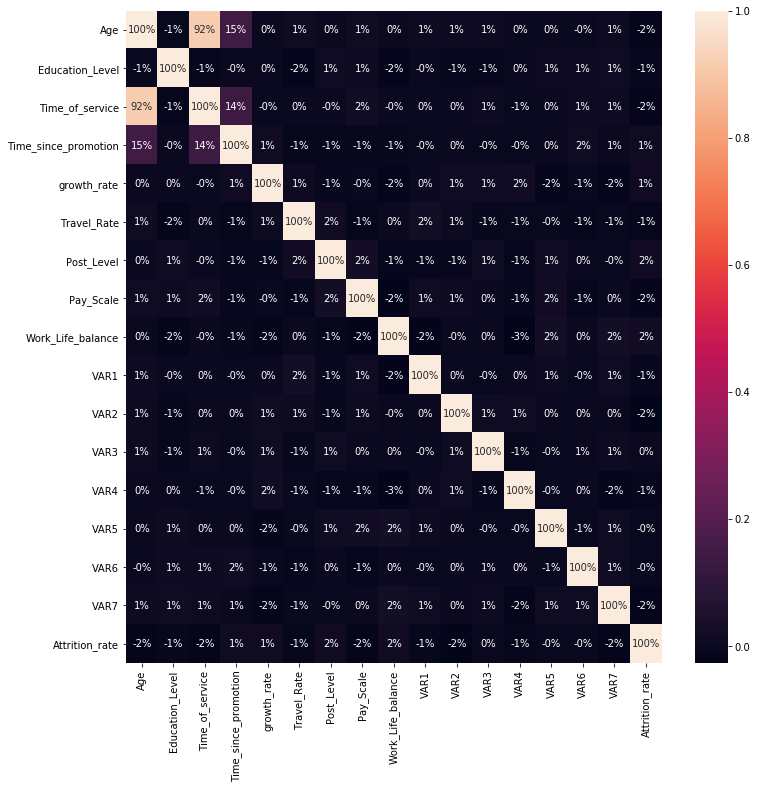

In [73]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

In [75]:
#transform non numerical into numerical
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    else:
        df[column] = LabelEncoder().fit_transform(df[column])


In [77]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,4143,0,42.0,3,0,1,2,2,4.0,4,...,2,3.0,3,0.7516,1.8688,2.0,3,0,2,0.1841
1,2500,1,24.0,2,1,3,3,0,5.0,4,...,2,4.0,2,-0.9612,-0.4537,2.0,2,0,2,0.0670
2,5312,0,58.0,2,0,0,8,2,27.0,3,...,2,1.0,3,-0.9612,-0.4537,3.0,2,3,2,0.0851
3,2339,0,26.0,2,1,2,1,1,4.0,3,...,2,1.0,2,-1.8176,-0.4537,NaN,2,2,2,0.0668
4,3885,0,31.0,0,0,3,3,2,5.0,4,...,3,3.0,0,0.7516,-0.4537,2.0,1,3,1,0.1827


In [15]:
df = one_hot(df, ['Relationship_Status', 'Unit', 'Compensation_and_Benefits'])

In [78]:
def scale(partitions, scaler='MinMaxScaler', df=pd.DataFrame(), to_float=False, return_df=False):
  #return_df == True, allora output = scaler, df
  #return_df == False, allora output = df
  from sklearn.preprocessing import RobustScaler
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.preprocessing import StandardScaler
  
  if scaler == 'RobustScaler':
    f_transformer = RobustScaler()
  elif scaler == 'MinMaxScaler':
    f_transformer = MinMaxScaler(feature_range=(0, 1))
  elif scaler == 'StandardScaler':
    f_transformer = StandardScaler()
  
  #partitions = 'all_df', le fa tutte insieme e trasforma il df in un numpy.array
  if partitions == 'all_df':
    if to_float == True:
      df = df.astype('float32')
    if df.empty == True:
      X = df.copy()
    #tutto df deve essere con float32
    df_col = df.columns
    df = f_transformer.fit_transform(df.values) #ne esce un inspiegabile numpy array
    df = pd.DataFrame(df)
    df.columns = df_col
    if return_df == True:
      return f_transformer, df
    else:
      X = df.copy()
    return f_transformer

In [79]:
df = df.dropna() #se c'è y, test allora droppa tutti i test
df = df.reset_index()
df.pop('index')

#   one_hot


#   scaling
#numerical
numerical = df[['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Pay_Scale', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3','VAR4', 'VAR5', 'VAR6', 'VAR7', 'Post_Level']]
scaler, numerical = scale('all_df', scaler='StandardScaler', df=numerical, to_float=True, return_df=True)
#categorical
categorical = df.drop(['Age', 'Education_Level', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Pay_Scale', 'Work_Life_balance','VAR1', 'VAR2', 'VAR3','VAR4', 'VAR5', 'VAR6', 'VAR7', 'Post_Level'], axis=1)

#   putting back together
df = pd.concat([numerical, categorical], axis=1)
X= df.drop(['Employee_ID', 'Decision_skill_possess', 'Gender', 'Hometown'], axis=1)
y = pd.DataFrame(X.pop('Attrition_rate'))
X

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Post_Level,Relationship_Status,Unit,Compensation_and_Benefits
0,0.170306,0.765559,-0.909918,1.427451,-0.891204,0.289118,0.478881,0.544977,1.071242,0.769583,1.892608,0.201876,1.235385,-1.814326,-0.270160,-1.536869,0,2,2
1,-1.152519,-0.171992,-0.813432,1.427451,-0.700715,-1.261634,-0.009488,1.436560,-0.113298,-0.959533,-0.447930,0.201876,0.171173,-1.814326,-0.270160,0.176346,1,3,2
2,1.346150,-0.171992,1.309253,0.555871,0.251732,-1.261634,0.967251,-1.238190,1.071242,-0.959533,-0.447930,2.097738,0.171173,0.770738,-0.270160,-0.680261,0,8,2
3,-0.638087,-2.047096,-0.813432,1.427451,0.950193,0.289118,-1.962967,0.544977,-2.482378,0.769583,-0.447930,0.201876,-0.893040,0.770738,-1.357504,0.176346,0,3,3
4,1.052189,-0.171992,0.537368,-1.187290,-1.653161,1.839870,1.455621,-1.238190,-0.113298,-1.824090,1.892608,0.201876,-0.893040,0.770738,-0.270160,1.889562,0,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5348,-1.226009,1.703111,-0.909918,-1.187290,-1.716658,0.289118,-0.009488,0.544977,-2.482378,0.769583,-0.447930,0.201876,0.171173,-0.090950,-0.270160,-0.680261,0,5,3
5349,0.317286,-2.047096,0.247910,-0.315710,0.759704,-1.261634,-0.986228,0.544977,-1.297838,-0.094975,-2.788469,0.201876,1.235385,0.770738,0.817184,-0.680261,0,9,3
5350,0.684738,-0.171992,-0.331004,-1.187290,0.759704,0.289118,-1.474597,1.436560,-1.297838,-0.094975,-0.447930,0.201876,1.235385,0.770738,-0.270160,-0.680261,1,2,2
5351,0.537757,-0.171992,1.019796,-1.187290,-1.653161,0.289118,0.967251,-0.346607,1.071242,0.769583,1.892608,0.201876,0.171173,-0.952638,-0.270160,1.889562,0,10,0


In [80]:
df.isnull().any()

Age                          False
Education_Level              False
Time_of_service              False
Time_since_promotion         False
growth_rate                  False
Travel_Rate                  False
Pay_Scale                    False
Work_Life_balance            False
VAR1                         False
VAR2                         False
VAR3                         False
VAR4                         False
VAR5                         False
VAR6                         False
VAR7                         False
Post_Level                   False
Employee_ID                  False
Gender                       False
Relationship_Status          False
Hometown                     False
Unit                         False
Decision_skill_possess       False
Compensation_and_Benefits    False
Attrition_rate               False
dtype: bool

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
y_train

,Attrition_rate
2369,0.5410
3955,0.0881
3785,0.0811
120,0.0579
3699,0.1857
...,...
3092,0.5473
3772,0.7360
5191,0.1833
5226,0.0251


In [90]:
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

In [91]:
for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)
ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, thresh

/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PassiveAggressiveRegressor(C=1.0, average=False, early_stopping=False,
                           epsilon=0.1, fit_intercept=True,
                           loss='epsilon_insensitive', max_iter=1000,
                           n_iter_no_change=5, random_state=None, shuffle=True,
                           tol=0.001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=None, tol=0.001, verbose=False)


/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/akanshajajodia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [92]:
#from sklearn.svm import SVR
#clf = SVR(kernel='poly', C=30, gamma='auto', degree=55, epsilon=.1, coef0=1)
#clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test) #

from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

-0.008227758285404674


In [94]:
y_test = y_test.reset_index()
y_test

,level_0,index,Attrition_rate
0,0,5010,0.0989
1,1,1650,0.0869
2,2,401,0.2270
3,3,4222,0.3406
4,4,1684,0.0079
...,...,...,...
1066,1066,2939,0.1923
1067,1067,3893,0.2496
1068,1068,4325,0.1761
1069,1069,4671,0.0250


In [96]:

y_pred = pd.DataFrame(y_pred)
y_pred

total = pd.concat([y_test, pd.DataFrame(y_pred)], axis=1)
total

,level_0,index,Attrition_rate,0
0,0,5010,0.0989,0.194573
1,1,1650,0.0869,0.187774
2,2,401,0.2270,0.185422
3,3,4222,0.3406,0.212209
4,4,1684,0.0079,0.198676
...,...,...,...,...
1066,1066,2939,0.1923,0.209480
1067,1067,3893,0.2496,0.203584
1068,1068,4325,0.1761,0.201080
1069,1069,4671,0.0250,0.204021


In [100]:

y_test = pd.DataFrame(y_test)
y_test



,level_0,Attrition_rate
0,0,0.0989
1,1,0.0869
2,2,0.2270
3,3,0.3406
4,4,0.0079
...,...,...
1066,1066,0.1923
1067,1067,0.2496
1068,1068,0.1761
1069,1069,0.0250
